In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img,cmap="gray")

In [4]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [5]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [6]:
# 绘图，鼠标交互，滚动条交互是opencv中GUI的重要知识

# 19.1 绘画基础

In [7]:
# cv2.line()       绘制直线
# cv2.rectangle()  绘制矩形
# cv2.circle()     绘制圆
# cv2.ellipse()    绘制椭圆
# cv2.polylines()  绘制多边形
# cv2.putText()    添加文字

# 这些函数有些共同参数：
# img：绘制图形的载体图像
# color：绘制形状的颜色（BGR）
# thickness：线条粗细，默认1，-1表示填充图形
# lineType：线条类型，默认是8连接类型，具体有一下几种：
# cv2.FILLED   填充
# cv2.LINE_4   4连接类型
# cv2.LINE_8   8连接类型
# cv2.LINE_AA  抗锯齿，该参数会让线条更平滑
# shift：数据精度。该参数用来控制数值（如圆心坐标）的精度，一般不需设置

### 19.1.1 绘制直线

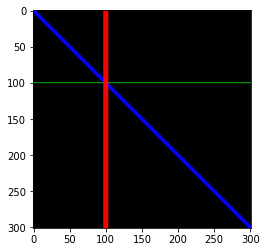

In [8]:
# img = cv2.line(img,pt1,pt2,color[,thickness[,lineType]])
# pt1：线段的第一个点（起点坐标）
# pt2：线段的第二个点（终点坐标）

n = 300
img = np.zeros((n+1,n+1,3),np.uint8)

img = cv2.line(img,(0,0),(n,n),(255,0,0),3)
img = cv2.line(img,(0,100),(n,100),(0,255,0),1)
img = cv2.line(img,(100,0),(100,n),(0,0,255),6)

img_show(img)

### 19.1.2 绘制矩形

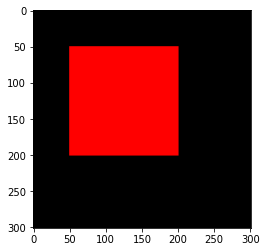

In [9]:
# img = cv2.rectangle(img,pt1,pt2,color[,thickness[,lineType]])
# pt1：矩形顶点
# pt2：与pt1对角线顶点

n = 300
img = np.zeros((n+1,n+1,3),np.uint8)

img = cv2.rectangle(img,(50,50),(n-100,n-100),(0,0,255),-1)

img_show(img)

# 19.1.3 绘制圆形

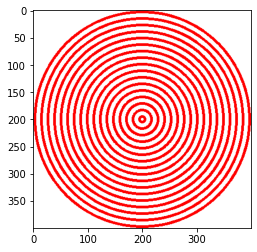

In [10]:
# img = cv2.circle(img,center,radius,color[thickness[,lineType]])
# center：圆心坐标
# radius：半径

d = 400
img = np.ones((d,d,3),np.uint8)*255

(x,y) = (round(img.shape[1]/2),round(img.shape[0]/2))
for r in range(5,round(d/2),12):
    cv2.circle(img,(x,y),r,(0,0,255),3)

img_show(img)

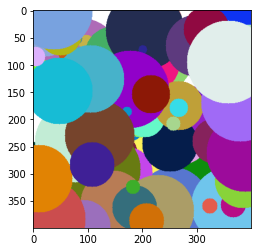

In [11]:
# 在白色背景图上绘制一组位置和大小均随机的实心圆
d = 400
img = np.ones((d,d,3),np.uint8)*255

for i in range(100):
    x = np.random.randint(0,high=d)
    y = np.random.randint(0,high=d)
    radius = np.random.randint(5,high=d/5)
    color = np.random.randint(0,high=256,size=(3,)).tolist()  # 随机生成3个[0,256)的随机数
    cv2.circle(img,(x,y),radius,color,-1)

img_show(img)

### 19.1.4 绘制椭圆

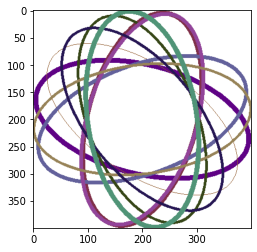

In [12]:
# img = cv2.ellipse(img,center,axes,angle,startAangle,endAngle,color[,thickness[,lineType]])
# center：椭圆中心坐标
# axes：轴的长度
# 偏转角度
# startAngle：圆弧起始角的角度
# endAngle：圆弧终结角的角度

d = 400
img = np.ones((d,d,3),np.uint8)*255

center = (round(d/2),round(d/2))
axes = (100,200)  # 轴长度
for i in range(10):
    angle = np.random.randint(0,361)  # 偏移角度
    color = np.random.randint(0,156,(3,)).tolist()
    thickness = np.random.randint(1,9)
    cv2.ellipse(img,center,axes,angle,0,360,color,thickness)

img_show(img)

### 19.1.5 绘制多边形

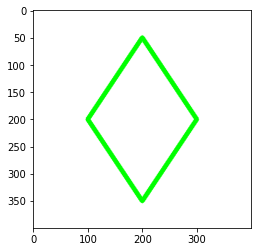

In [13]:
# img = cv2.polylines(img,pts,isClosed,color[,thickness[,lineType[,shift]]])
# pts：多边形的各个顶点，必须是np.int32的数组
# isClosed：是否封闭

d = 400
img = np.ones((d,d,3),np.uint8)*255

pts = np.array([[200,50],[300,200],[200,350],[100,200]],np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,0),8)

img_show(img)

### 19.1.6 在图形上绘制文字

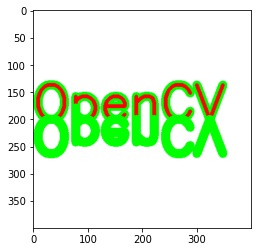

In [14]:
# img = cv2.putText(img,text,org,fontFace,fontScale,color[,thickness[,lineType[,bottomLeftOrigin]]])
# text：要绘制的文字
# 绘制文字的位置，以文字左下角点为起点
# fontFace：字体类型，参见如下：
# cv2.FONT_HERSHEY_SIMPLEX         正常大小的sans-serif字体
# cv2.FONT_HERSHEY_PLAIN           小号的sans-serif字体
# cv2.FONT_HERSHEY_DUPLEX          正常大小的sans-serif字体（比cv2.FONT_HERSHEY_SIMPLEX更复杂）
# cv2.FONT_HERSHEY_COMPLEX         正常大小的sans字体
# cv2.FONT_HERSHEY_TRIPLEX         正常大小的sans-serif字体（比cv2.FONT_HERSHEY_COMPLEX更复杂）
# cv2.FONT_HERSHEY_COMPLEX_SAMALL  cv2.FONT_HERSHEY_COMPLEX字体的简化版
# cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  手写风格的字体
# cv2.FONT_HERSHEY_SCRIPT_COMPLEX  cv2.FONT_HERSHEY_SCRIPT_SIMPLEX字体的进阶版
# cv2.FONT_ITALIC                  斜体标记
# fontScale：字体大小
# bottomLeftOrigin：控制文字方向，默认False：水平方向；True：垂直镜像效果

d = 400
img = np.ones((d,d,3),np.uint8)*255

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,"OpenCV",(0,200),font,3,(0,255,0),15)
cv2.putText(img,"OpenCV",(0,200),font,3,(0,0,255),5)
cv2.putText(img,"OpenCV",(0,200),font,3,(0,255,0),15,cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,True)

img_show(img)

# 19.2 鼠标交互

In [15]:
# 鼠标触发事件，一般先创建一个OnMouseActon响应函数，将要实现的操作写在该响应函数内
# 创建响应函数：
# def OnMouseAction(event,x,y,flags,param):
# event：出发事件
# x,y：触发鼠标事件时，鼠标在窗口的坐标（x,y）
# flags：鼠标拖拽事件，以及鼠标联合事件
# param：函数ID，标识所相应的事件函数，相当于自定义了一个OnMouseAction()函数的ID

# 参数event表：
# cv2.EVENT_LBUTTONDBLCLK     双击左键
# cv2.EVENT_LBUTTONDOWN       按下左键
# cv2.EVENT_LBUTTONUP         抬起左键
# cv2.EVENT_MBUTTONDBLCLK     双击中键
# cv2.EVENT_MBUTTONDOWN       按下中键
# cv2.EVENT_MBUTTONUP         抬起中键
# cv2.EVENT_MOUSEHWHEEL       滚轮滑动（正值和负值标识向左和向右滚动）
# cv2.EVENT_MOUSEWHEEL        滚轮滑动（正值和负值标识向前和向后滚动）
# cv2.EVENT_MOUSEMOVE         鼠标滑动
# cv2.EVENT_RBUTTONDBLCLK     双击右键
# cv2.EVENT_RBUTTONDOWN       按下右键
# cv2.EVENT_RBUTTONUP         抬起右键

# 参数flags表：
# cv2.EVENT_FLAG_ALTKEY       按下Alt键
# cv2.EVENT_FLAG_CTRLKEY      按下Ctrl键
# cv2.EVENT_FLAG_LBUTTON      左键拖曳
# cv2.EVENT_FLAG_MBUTTON      中键拖曳
# cv2.EVENT_FLAG_RBUTTON      右键拖曳
# cv2.EVENT_FLAG_SHIFTKEY     按下shift键

# 定义相应函数后，将该函数与一个特定窗口建立联系（绑定），让窗口内的鼠标触发事件时，能够找到该函数并执行：
# cv2.setMouseCallback(window,onMouse)
# window：绑定的窗口名
# onMouse：相应函数名

# 可以通过下面方法查看opencv所支持的鼠标事件：
# events = [i for i in dir(cv2) if 'EVENT' in i]
# print(events)

In [16]:
# 创建相应函数
def Demo(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("单击了鼠标左键")
    elif event == cv2.EVENT_RBUTTONDOWN:
        print("单击了鼠标右键")
    elif event == cv2.EVENT_FLAG_LBUTTON:
        print("按住左键拖动了鼠标")
        
# 将相应函数与窗口建立连接（绑定）
img = np.ones((300,300,3),np.uint8)*255
cv2.namedWindow("Demo19")            # 创建窗口
cv2.setMouseCallback("Demo19",Demo)  # 绑定窗口
cv2.imshow("Demo19",img)

cv2.waitKey()
cv2.destroyAllWindows()

单击了鼠标左键


In [17]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### 19.2.1 简单示例

In [24]:
# 设计一个程序，双击鼠标后，绘制以当前位置为顶点，大小随机，颜色随机的矩形
d = 400
def draw(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        p1x=x
        p1y=y
        p2x=np.random.randint(1,d-50)
        p2y=np.random.randint(1,d-50)
        color=np.random.randint(0,256,(3,)).tolist()
        cv2.rectangle(img,(p1x,p1y),(p2x,p2y),color,2)
        
img = np.ones((d,d,3),dtype="uint8")*255
cv2.namedWindow("Rectangle")
cv2.setMouseCallback("Rectangle",draw)

while(1):
    cv2.imshow("Rectangle",img)
    if cv2.waitKey(20)==27:
        break
        
cv2.destroyAllWindows()

### 19.2.2 进阶示例

In [29]:
# 设计一个程序，通过控制键盘与鼠标的组合控制显示不同的形状或文字
d = 400
thickness = -1
mode = 1

def draw_circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        a = np.random.randint(1,d-50)
        r = np.random.randint(1,d/5)
        angle = np.random.randint(0,361)
        color = np.random.randint(0,256,(3,)).tolist()
        if mode == 1:
            cv2.rectangle(img,(x,y),(a,a),color,thickness)
        elif mode == 2:
            cv2.circle(img,(x,y),r,color,thickness)
        elif mode == 3:
            cv2.line(img,(a,a),(x,y),color,3)
        elif mode == 4:
            cv2.ellipse(img,(x,y),(100,150),angle,0,360,color,thickness)
        elif mode == 5:
            cv2.putText(img,"opencv",(0,round(d/2)),cv2.FONT_HERSHEY_SIMPLEX,2,color,5)
            
img = np.ones((d,d,3),np.uint8)*255
cv2.namedWindow("image")
cv2.setMouseCallback('image',draw_circle)

while 1:
    cv2.imshow("image",img)
    k = cv2.waitKey(1)&0xff
    if k == ord('r'):
        mode = 1
    elif k == ord('c'):
        mode = 2
    elif k == ord('l'):
        mode = 3
    elif k == ord('e'):
        mode = 4
    elif k == ord('t'):
        mode = 5
    elif k == ord('f'):
        thickness = -1
    elif k == ord('u'):
        thickness = 3
    elif k == 27:
        break
        
cv2.destroyAllWindows()

# 19.3 滚动条

In [30]:
# 滚动条依附窗口而存在，通过调节滚动条能够设置，获取指定范围内的特定值
# 定义滚动条：
# cv2.createTrackbar(trackbarname,winname,value,count,onChange)
# trackbarname：滚动条名称
# winname：滚动条所依附的窗口名称
# value：初始值，决定滚动条中滑块的位置
# count：滚动条的最大值，通常其最小值是0
# onChange：回调函数。将滚动条改变后要实现的操作写在回调函数内

# 函数cv2.createTrackbar()用于生成滚动条，拖动滚动条，就可以设置滚动条的值，并让滚动条返回对应值
# 滚动条的值可以通过cv2.getTrackbarPos()获取：
# retval = getTrackbarPos(trackbarname,winname)
# retval：返回值
# trackbarname：滚动条名称
# winname：滚动条依附窗口的名称

In [32]:
# 设计宇哥滚动条交互程序，通过滚动条模拟调色板效果
def changeColor(x):
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    img[:] = [b,g,r]
    
img = np.zeros((100,700,3),np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('R','image',0,255,changeColor)
cv2.createTrackbar('G','image',0,255,changeColor)
cv2.createTrackbar('B','image',0,255,changeColor)

while True:
    cv2.imshow('image',img)
    k = cv2.waitKey(1)&0xff
    if k == 27:
        break
    
cv2.destroyAllWindows()

### 19.3.2 用滚动条控制阈值处理参数

In [38]:
# 设计一个滚动条交互程序，控制函数cv2.threshold()的阈值和模式参数
# retval,dst = cv2.threshold(src,thresh,maxval,type)
Type = 0   # 阈值处理方式
Value = 0  # 使用的阈值

def onType(a):
    Type = cv2.getTrackbarPos(tType,windowName)
    Value = cv2.getTrackbarPos(tValue,windowName)
    ret,dst = cv2.threshold(o,Value,255,Type)
    cv2.imshow(windowName,dst)
    
def onValue(a):
    Type = cv2.getTrackbarPos(tType,windowName)
    Value = cv2.getTrackbarPos(tValue,windowName)
    ret,dst = cv2.threshold(o,Value,255,Type)
    cv2.imshow(windowName,dst)
    
o = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)
windowName = "Demo19.3.2"
cv2.namedWindow(windowName)
cv2.imshow(windowName,o)

tType = "Type"
tValue = "Value"
cv2.createTrackbar(tType,windowName,0,4,onType)
cv2.createTrackbar(tValue,windowName,0,255,onValue)

if cv2.waitKey(0)==27:
    cv2.destroyAllWindows()

### 19.3.3 用滚动条作为开关

In [42]:
# 也可用滚动条作为开关，此时值只有0和1两种，代表False和True
# 设计一个交互程序，用滚动条控制绘制的矩形是实心还是空心
d = 400
global thickness
thickness = -1

def fill(x):
    pass

def draw(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        p1x = x
        p1y = y
        p2x = np.random.randint(1,d-50)
        p2y = np.random.randint(1,d-50)
        color = np.random.randint(0,256,(3,)).tolist()
        cv2.rectangle(img,(p1x,p1y),(p2x,p2y),color,thickness)
        
img = np.zeros((d,d,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",draw)
cv2.createTrackbar("R","image",0,1,fill)

while True:
    cv2.imshow("image",img)
    k = cv2.waitKey(1)&0xff
    g = cv2.getTrackbarPos('R',"image")
    if g == 0:
        thickness = -1
    else:
        thickness = 2
    if k == 27:
        break
        
cv2.destroyAllWindows()